# Project 1

You are tasked with developing a computer vision algorithm to detect the edges of objects in the Yemisi Shyllon Museum of Arts (YSMA), captured by a camera mounted on a tripod. The program should accurately identify the boundaries of objects to assist in understanding better edge detection. With your knowledge so far develop the application that provides the different edge operators to visitors to the museum. A visitor should be able to choose any edge operator of interest to view any object.


In [1]:
import os
import re
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_edge_detection(image):
    # Resize image
    image = cv2.resize(image, (500, 400))
    
    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Combine the gradient images
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    
    return image, sobel_combined

def prewitt_edge_detection(image):
    # Resize image
    image = cv2.resize(image, (500, 400))
    
    # Define Prewitt kernels
    kernel_x = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]])
    
    kernel_y = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])
    
    # Apply Prewitt edge detection
    prewitt_x = cv2.filter2D(image, -1, kernel_x)
    prewitt_y = cv2.filter2D(image, -1, kernel_y)
    
    # Compute magnitude of gradients manually
    prewitt_combined = np.sqrt(np.square(prewitt_x) + np.square(prewitt_y))
    
    return image, prewitt_combined

def robert_edge_detection(image):
    # Perform Gaussian Blur
    image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Define Robert kernels
    kernel_x = np.array([[1, 0],
                         [0, -1]])
    
    kernel_y = np.array([[0, 1],
                         [-1, 0]])
    
    # Apply Robert edge detection
    robert_x = cv2.filter2D(image, -1, kernel_x)
    robert_y = cv2.filter2D(image, -1, kernel_y)
    
    # Combine the gradient images
    robert_combined = np.sqrt(np.square(robert_x) + np.square(robert_y))
    
    return image, robert_combined

def laplacian_edge_detection(image):
    # Resize image
    image = cv2.resize(image, (400, 400))
    
    # Apply Laplacian edge detection
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    # Convert the output to an 8-bit image
    laplacian = cv2.convertScaleAbs(laplacian)
    
    return image, laplacian

def canny_edge_detection(image):
    # Resize image
    image = cv2.resize(image, (400, 400))
    
    # Perform Canny edge detection
    edges = cv2.Canny(image, 100, 200) # Adjust the threshold values as needed
    
    return image, edges


In [3]:
def format_title(title):
    title_without_format = title.split('.')[0]
    return ' '.join(word.capitalize() for word in title_without_format.split('-'))

def unformat_title(formatted_title):
    return '-'.join(word.lower() for word in formatted_title.split())

def get_numeric_input(prompt, error_message=None):
    while True:
        try:
            value = int(input(prompt))
            return value
        except ValueError:
            if error_message:
                print(error_message)
            else:
                print("Invalid input. Please enter a number.")


# Function to display categories
def display_categories():
    categories = ['Traditional Art', 'Modern Art', 'Contemporary Art']
    for i, category in enumerate(categories, 1):
        print(f"{i}. {category}")

def display_images(category):
    category = category.lower().replace(" ", "-")
    category_folder = f"../images/project-images/{category}/"
    images = sorted(os.listdir(category_folder))
    num_images = len(images)

    # Calculate the number of rows and columns for the grid
    num_cols = 4  # Adjust as needed
    num_rows = (num_images - 1) // num_cols + 1

    # Display images in a grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            img = cv2.imread(category_folder + images[i])
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax.set_title(f"{i + 1}. {format_title(images[i])}")
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()
    return category_folder, images


def select_image(category_folder, images):
    while True:
        choice = input("Enter the number of the image you want to transform (or 'exit' to quit): ")
        if choice.lower() == 'exit':
            return None
        if choice.isdigit():
            index = int(choice) - 1
            if 0 <= index < len(images):
                print(f"\nYou have selected image {index + 1}: {format_title(images[index])}")
                img = cv2.imread(category_folder + images[index])
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.title(f"{format_title(images[index])}")
                
                plt.show()
                return images[index]
        print("Invalid input. Please enter a valid image number.")

In [4]:
def perform_edge_detection(image_path, edge_detection_method):
    edge_detected_img = None
    image = None
    
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    
    edge_detection_methods = {
        1: 'Sobel',
        2: 'Prewitt',
        3: 'Robert',
        4: 'Laplacian',
        5: 'Canny'
    }

    # Check if the edge detection method exists
    if edge_detection_method not in edge_detection_methods:
        print("Invalid edge detection method.")
        return
    
    # Execute the selected edge detection method
    if edge_detection_method == 1:
        image, edge_detected_img = sobel_edge_detection(original_img)
        
    elif edge_detection_method == 2:
        image, edge_detected_img = prewitt_edge_detection(original_img)
        
    elif edge_detection_method == 3:
        image, edge_detected_img = robert_edge_detection(original_img)
        
    elif edge_detection_method == 4:
        image, edge_detected_img = laplacian_edge_detection(original_img)
        
    elif edge_detection_method == 5:
        image, edge_detected_img = canny_edge_detection(original_img)
    
    # Display the original and edge-detected images side by side
    if edge_detected_img is not None:
        
        # Plot the original image
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(image, cmap='gray')

        # Plot the edge-detected image
        plt.subplot(1, 2, 2)
        plt.title(f"{edge_detection_methods[edge_detection_method]} Edges")
        plt.imshow(edge_detected_img, cmap='gray')
        
        plt.show()


Welcome to the Yemisi Shyllon Museum of Art!

Please select a category:
1. Traditional Art
2. Modern Art
3. Contemporary Art

Enter the number of the category you're interested in: 2

Displaying images from Modern Art category:


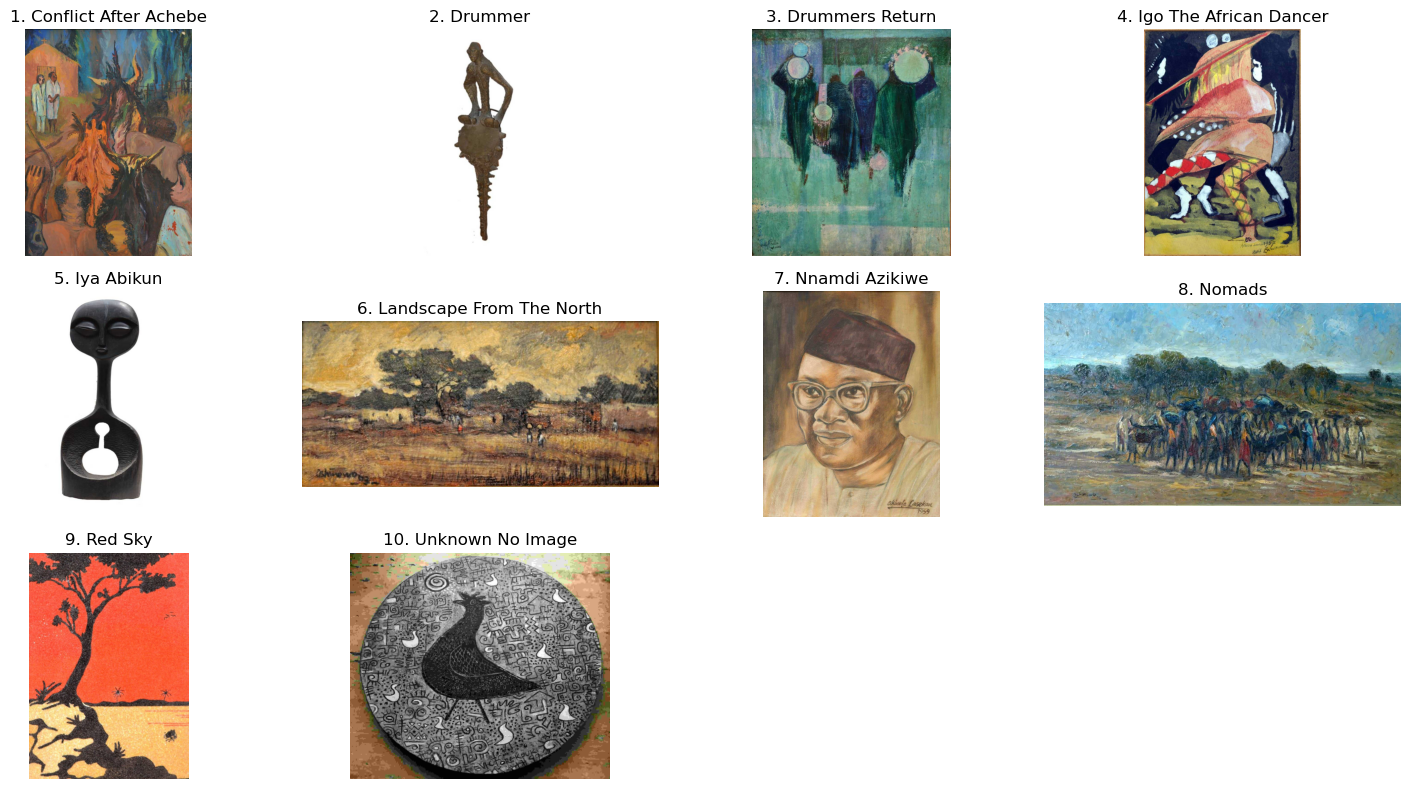

Enter the number of the image you want to transform (or 'exit' to quit): 1

You have selected image 1: Conflict After Achebe


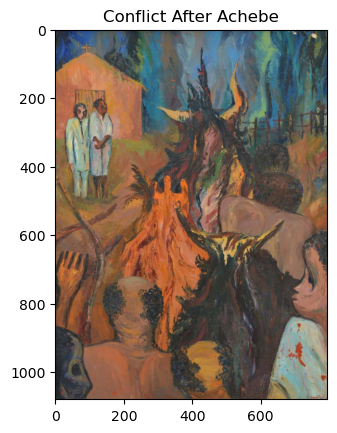


Available edge detection methods:
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny

Enter the number of the edge detection method you want to apply: 1

Applying Sobel edge detection to Conflict After Achebe:


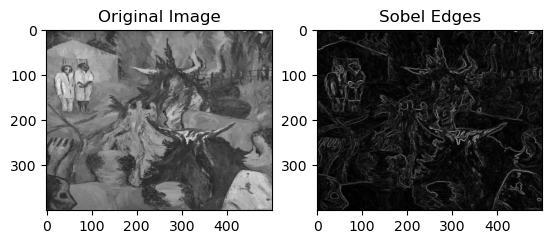

Enter the number of the image you want to transform (or 'exit' to quit): 2

You have selected image 2: Drummer


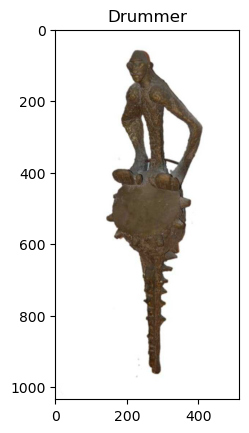


Available edge detection methods:
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny

Enter the number of the edge detection method you want to apply: 2

Applying Prewitt edge detection to Drummer:


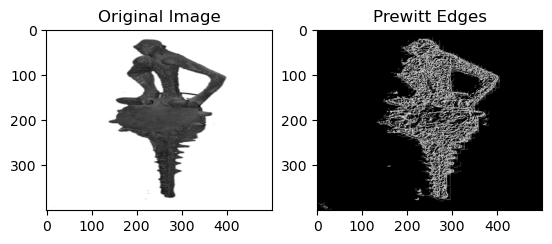

Enter the number of the image you want to transform (or 'exit' to quit): 3

You have selected image 3: Drummers Return


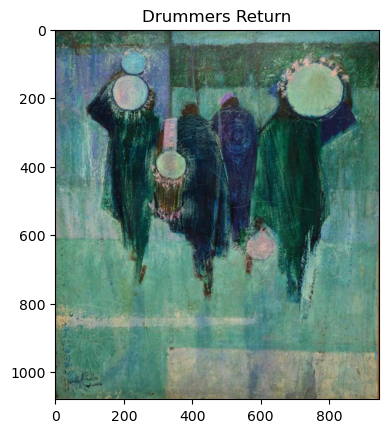


Available edge detection methods:
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny

Enter the number of the edge detection method you want to apply: 3

Applying Robert edge detection to Drummers Return:


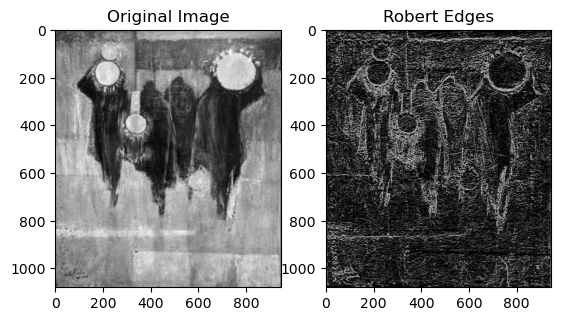

Enter the number of the image you want to transform (or 'exit' to quit): 4

You have selected image 4: Igo The African Dancer


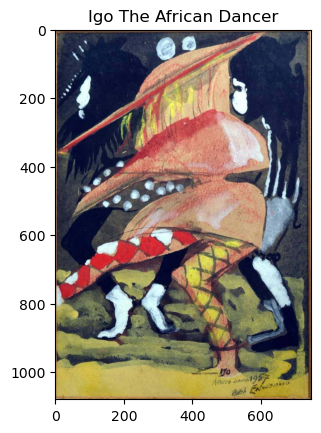


Available edge detection methods:
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny

Enter the number of the edge detection method you want to apply: 4

Applying Laplacian edge detection to Igo The African Dancer:


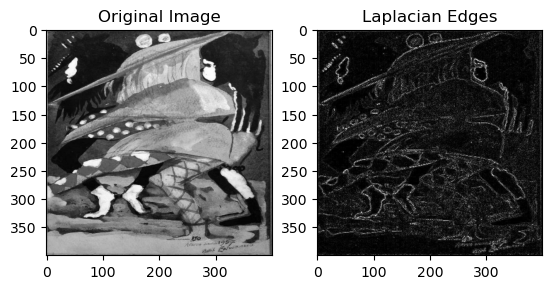

Enter the number of the image you want to transform (or 'exit' to quit): 5

You have selected image 5: Iya Abikun


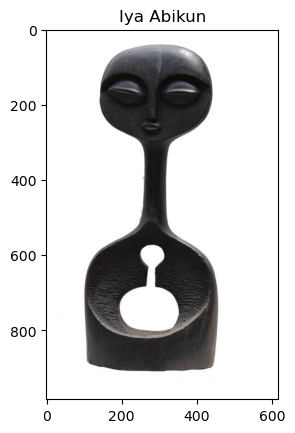


Available edge detection methods:
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny

Enter the number of the edge detection method you want to apply: 5

Applying Canny edge detection to Iya Abikun:


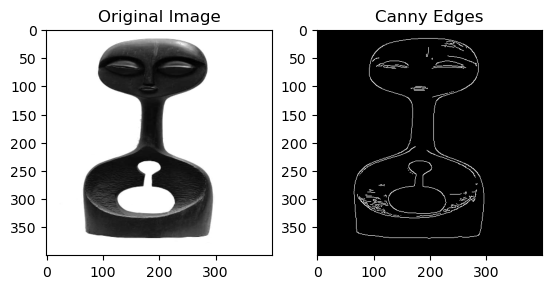

Enter the number of the image you want to transform (or 'exit' to quit): 6

You have selected image 6: Landscape From The North


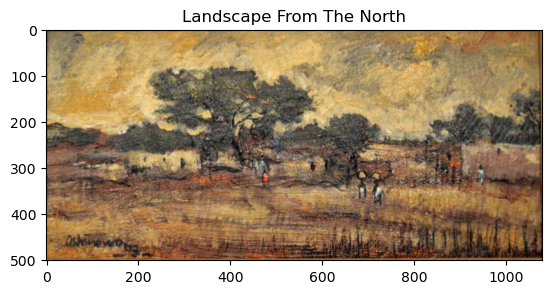


Available edge detection methods:
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny

Enter the number of the edge detection method you want to apply: 1

Applying Sobel edge detection to Landscape From The North:


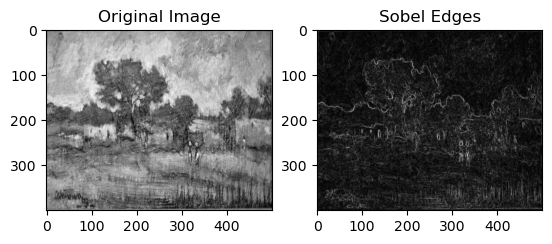

Enter the number of the image you want to transform (or 'exit' to quit): 7

You have selected image 7: Nnamdi Azikiwe


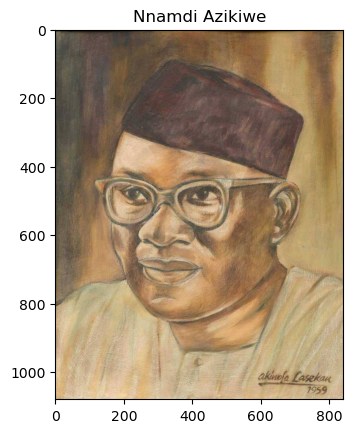


Available edge detection methods:
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny

Enter the number of the edge detection method you want to apply: 2

Applying Prewitt edge detection to Nnamdi Azikiwe:


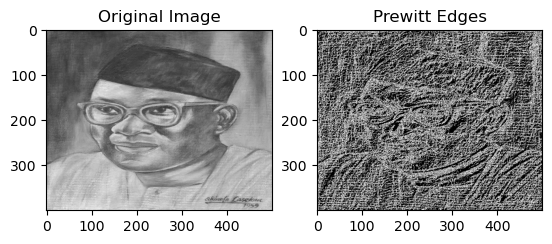

Enter the number of the image you want to transform (or 'exit' to quit): 8

You have selected image 8: Nomads


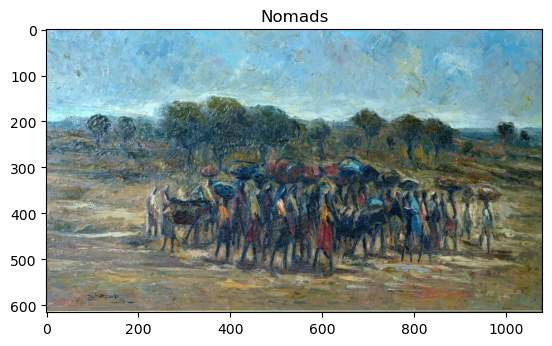


Available edge detection methods:
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny

Enter the number of the edge detection method you want to apply: 3

Applying Robert edge detection to Nomads:


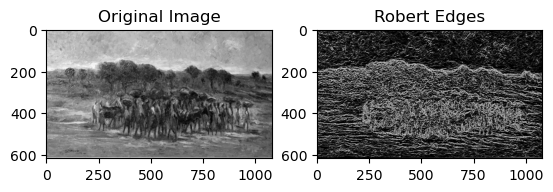

Enter the number of the image you want to transform (or 'exit' to quit): 9

You have selected image 9: Red Sky


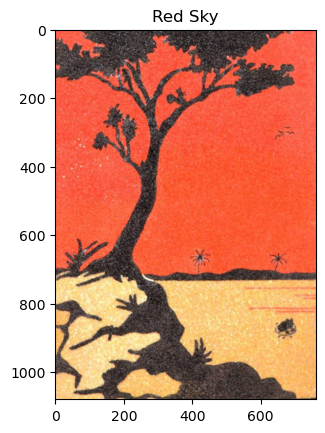


Available edge detection methods:
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny

Enter the number of the edge detection method you want to apply: 4

Applying Laplacian edge detection to Red Sky:


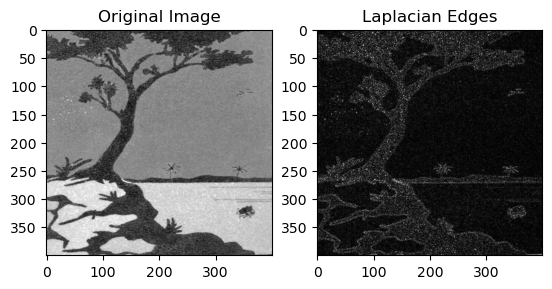

Enter the number of the image you want to transform (or 'exit' to quit): 10

You have selected image 10: Unknown No Image


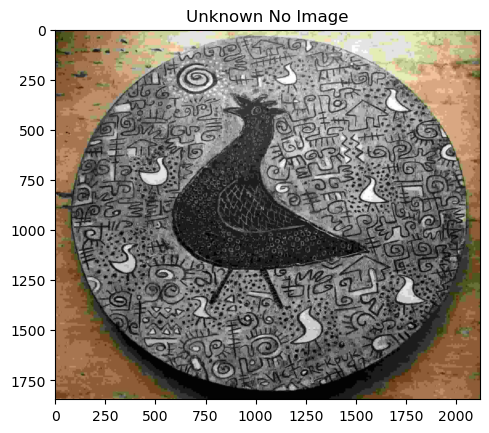


Available edge detection methods:
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny

Enter the number of the edge detection method you want to apply: 5

Applying Canny edge detection to Unknown No Image:


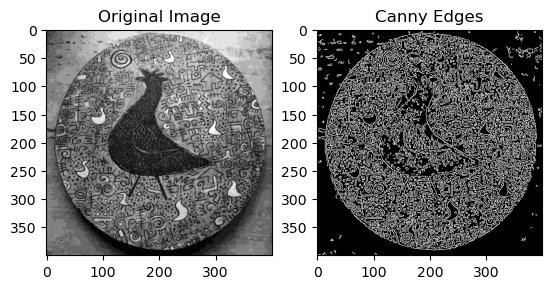

Enter the number of the image you want to transform (or 'exit' to quit): 11
Invalid input. Please enter a valid image number.
Enter the number of the image you want to transform (or 'exit' to quit): exit


In [5]:
print("Welcome to the Yemisi Shyllon Museum of Art!")
print("\nPlease select a category:")

display_categories()
category_choice = get_numeric_input("\nEnter the number of the category you're interested in: ")

category_map = {1: 'Traditional Art', 2: 'Modern Art', 3: 'Contemporary Art'}
selected_category = unformat_title(category_map.get(category_choice))

if selected_category:
    print(f"\nDisplaying images from {format_title(selected_category)} category:")
    category_folder, images = display_images(selected_category)

    while True:
        selected_image = select_image(category_folder, images)
        if not selected_image:
            break

        print("\nAvailable edge detection methods:")
        edge_detection_methods = [
            'Sobel', 'Prewitt', 'Robert', 'Laplacian', 'Canny'
        ]
        
        for i, method in enumerate(edge_detection_methods, 1):
            print(f"{i}. {method}")
            
        edge_detection_choice = get_numeric_input("\nEnter the number of the edge detection method you want to apply: ")
        
        if 1 <= edge_detection_choice <= len(edge_detection_methods):
            
            print(f"\nApplying {edge_detection_methods[edge_detection_choice - 1]} edge detection to {format_title(selected_image)}:")
            perform_edge_detection(f"../images/project-images/{selected_category}/{selected_image}", edge_detection_choice)
            
        else:
            print("\nInvalid edge detection method choice. Please try again.")

else:
    print("Invalid category choice. Please try again.")
